In [2]:
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 15.3 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=9ed71cc88192ef63370ec4c3318a4bfb797e48ffded329a7b0e98973159583f9
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [3]:
import pandas as pd
from bnlp import NLTKTokenizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
df_train = pd.read_excel('/content/drive/Shareddrives/TFQ/SentNoB_After_Def/noise_train.xlsx')
df_test = pd.read_excel('/content/drive/Shareddrives/TFQ/SentNoB_After_Def/noise_test.xlsx')
df_val = pd.read_excel('/content/drive/Shareddrives/TFQ/SentNoB_After_Def/noise_val.xlsx')

In [24]:
df_train.head()

,0,Data,Slang,Local,Word Misuse,Context/Word Missing,Wrong Serial,Mixed Language,Punctuation,Space Error,Spelling,Internet Garbage
0,0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,0,1,0,0,0,0,1,0,0,0
1,1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,1,0,0,0,0,0,1,0,1,0
2,2,ভাই আপনার কথাই যাদু রয়েছে,0,0,1,0,0,0,0,0,0,0
3,3,উওরটা আমার অনেক ভাল লেগেছে,0,0,1,0,0,0,0,0,1,0
4,4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0,0,0,0,0,1,0,0,0,0


In [12]:
df = pd.concat([df_train, df_test, df_val])

In [15]:
df = df.drop(0, axis=1)
df = df.drop('Data', axis=1)

In [18]:
col_name = ['Slang', 'Local', 'Word Misuse', 'Context/Word Missing', 'Wrong Serial',
            'Mixed Language', 'Punctuation', 'Space Error', 'Spelling', 'Internet Garbage']

for col in col_name:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.fillna(0)

In [19]:
df.head()

,Slang,Local,Word Misuse,Context/Word Missing,Wrong Serial,Mixed Language,Punctuation,Space Error,Spelling,Internet Garbage
0,0.0,1,0,0,0,0,1.0,0,0.0,0
1,1.0,0,0,0,0,0,1.0,0,1.0,0
2,0.0,0,1,0,0,0,0.0,0,0.0,0
3,0.0,0,1,0,0,0,0.0,0,1.0,0
4,0.0,0,0,0,0,1,0.0,0,0.0,0


In [20]:
df.corr()

,Slang,Local,Word Misuse,Context/Word Missing,Wrong Serial,Mixed Language,Punctuation,Space Error,Spelling,Internet Garbage
Slang,1.000000,0.053263,-0.018199,-0.028596,-0.006017,-0.109869,-0.044741,-0.016041,-0.014636,-0.037454
Local,0.053263,1.000000,-0.027234,-0.031664,-0.006828,-0.089458,-0.023971,-0.019527,-0.038763,-0.019259
Word Misuse,-0.018199,-0.027234,1.000000,0.012489,0.019279,-0.016882,0.015415,0.025280,-0.005175,-0.020264
Context/Word Missing,-0.028596,-0.031664,0.012489,1.000000,-0.007761,-0.069505,-0.055062,-0.036642,-0.041035,-0.020274
Wrong Serial,-0.006017,-0.006828,0.019279,-0.007761,1.000000,-0.020374,-0.006027,0.010420,-0.016418,-0.012988
Mixed Language,-0.109869,-0.089458,-0.016882,-0.069505,-0.020374,1.000000,-0.063010,-0.057668,-0.115818,0.009338
Punctuation,-0.044741,-0.023971,0.015415,-0.055062,-0.006027,-0.063010,1.000000,0.059929,0.028493,-0.051995
Space Error,-0.016041,-0.019527,0.025280,-0.036642,0.010420,-0.057668,0.059929,1.000000,0.031382,-0.038435
Spelling,-0.014636,-0.038763,-0.005175,-0.041035,-0.016418,-0.115818,0.028493,0.031382,1.000000,-0.066455
Internet Garbage,-0.037454,-0.019259,-0.020264,-0.020274,-0.012988,0.009338,-0.051995,-0.038435,-0.066455,1.000000


from matplotlib import pyplot as plt
_df_21['Slang'].plot(kind='hist', bins=20, title='Slang')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Local'].plot(kind='hist', bins=20, title='Local')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Word Misuse'].plot(kind='hist', bins=20, title='Word Misuse')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['Context/Word Missing'].plot(kind='hist', bins=20, title='Context/Word Missing')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='Slang', y='Local', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='Local', y='Word Misuse', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='Word Misuse', y='Context/Word Missing', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='Context/Word Missing', y='Wrong Serial', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Slang'].plot(kind='line', figsize=(8, 4), title='Slang')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Local'].plot(kind='line', figsize=(8, 4), title='Local')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['Word Misuse'].plot(kind='line', figsize=(8, 4), title='Word Misuse')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Context/Word Missing'].plot(kind='line', figsize=(8, 4), title='Context/Word Missing')
plt.gca().spines[['top', 'right']].set_visible(False)

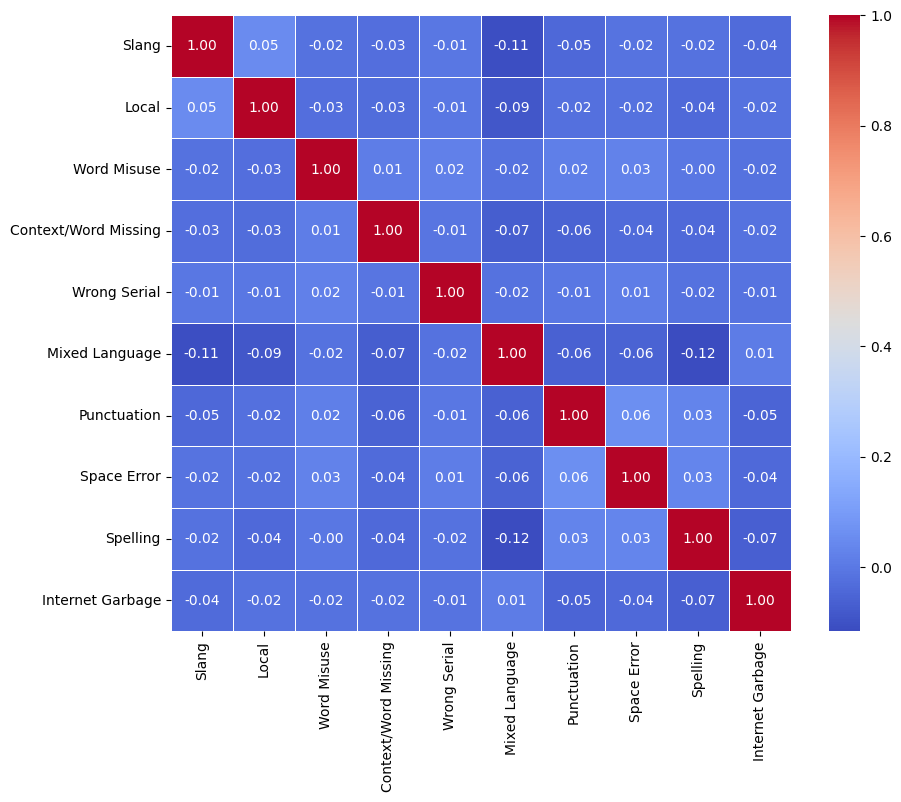

In [27]:
correlation_matrix = df.corr(method='kendall')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [ ]:
bnltk = NLTKTokenizer()

In [ ]:
df['len'] = [len(bnltk.word_tokenize(str(sentence))) for sentence in df['Data']]

In [ ]:
columns = ['Slang',	'Local',	'Word Misuse',	'Context/Word Missing',	'Wrong Serial',	'Mixed Language',	'Punctuation',	'Space Error',	'Spelling',	'Internet Garbage']

for i in columns:
  df_filtered = df[df[i] == 1]
  print(f'{i} --> Mean: {df_filtered["len"].mean()}, Count: {len(df_filtered)}, Percentage: {len(df_filtered)/len(df)}')

Slang --> Mean: 16.524148851939827, Count: 1263, Percentage: 0.08257060669456066
Local --> Mean: 16.047024952015356, Count: 2084, Percentage: 0.13624476987447698
Word Misuse --> Mean: 18.550680786686836, Count: 661, Percentage: 0.04321391213389121
Context/Word Missing --> Mean: 13.185454545454546, Count: 550, Percentage: 0.035957112970711295
Wrong Serial --> Mean: 15.304347826086957, Count: 69, Percentage: 0.004510983263598326
Mixed Language --> Mean: 17.907292165310356, Count: 6267, Percentage: 0.40971495815899583
Punctuation --> Mean: 17.25267201068804, Count: 5988, Percentage: 0.39147489539748953
Space Error --> Mean: 18.782166123778502, Count: 2456, Percentage: 0.16056485355648537
Spelling --> Mean: 17.298263709816055, Count: 5817, Percentage: 0.3802955020920502
Internet Garbage --> Mean: 15.446265938069217, Count: 549, Percentage: 0.03589173640167364
